In [1]:
#!/opt/conda/envs/lae2020/bin/python3

from importlib.abc import Loader
import sys
import os
import ruamel.yaml

sys.path.insert(0,"/home/chinahg/GCresearch/cantera/build/python")
sys.path.insert(1,"/home/chinahg/GCresearch/rocketemissions")

import cantera as ct
ct.add_directory('/user/chinahg')
ct.__file__

import h5py
import numpy as np
import time
import math as math
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import yaml
import shutil
from scipy import integrate
import matplotlib.pyplot as plt
import Analytical_Plume_fxns as ap

In [4]:
D = 2.90 # [m] initial plume diameter
U_a = 428 #ambient velocity [m/s] (need to import)
P_atm = 101325 # ambient pressure [Pa] ##NEED TO IMPORT
T0 = 1800 # [K] ##NEED TO IMPORT
xmax_ZEF = 100 # m
xmax_ZFE = 6.2*D
xmax = xmax_ZFE + xmax_ZEF # m total domain (including ZFE)

nx_ZEF = 100
nx_ZFE = 100
nr = 10000

u = np.zeros((nx_ZEF+nx_ZFE,nr))
c = np.zeros((nx_ZEF+nx_ZFE,nr))
u_ZFE0 = 1500 #rocket velocity (need to import)
c_ZFE0 = 600000 #tracer ppm test Ar
r_ZFE = np.zeros((nx_ZFE,nr)) #radial sampling points, for each x. For x = 1 sample points from r = 0 to r = b[i]

x_ZFE = np.linspace(0,xmax_ZFE,nx_ZFE)

beta_ZFE = 0.114
lmbda_ZFE = 1.2
A_c = c_ZFE0*(D/2) #step fxn area
A_u = u_ZFE0*(D/2) #step fxn area

#ZFE
u_ZFE, c_ZFE = ap.compute_ZFE(u, c, u_ZFE0, c_ZFE0, r_ZFE, x_ZFE, beta_ZFE, lmbda_ZFE, D, nx_ZFE, nr, xmax_ZFE, A_c, A_u)

#ZEF
T_a = 400 #K replace must import
lmbda_ZEF = 1.35
beta_ZEF = 0.154
r_ZEF = np.zeros((nx_ZEF,nr))

u_ZEF, c_ZEF, r_ZEF = ap.compute_ZEF(u, c, U_a, D, nx_ZFE, nx_ZEF, r_ZEF, xmax_ZFE, xmax_ZEF, nr, A_c, A_u)

#Compute T(x,r)
T_a = 400 #K
nT = 0.01

#T,rT = ap.diffusion(nx_ZFE, nx_ZEF, xmax, b, B, nT, T_a, T0) #ADD ZFE element to fxn

#Adding Cantera
n_species = 201
mdotAr = np.zeros((nx_ZEF,nr))
mdot_x = np.zeros(nx_ZEF)
rho = 1.69
A = np.zeros((nx_ZEF,nr))
x_ZEF = np.linspace(xmax_ZFE,xmax_ZEF,nx_ZEF)

#for i in range(0, nx_ZEF+nx_ZFE): # loop through axial direction
#    u,c = compute_ZFE()
#    for j in range(0,n_species): # loop through species (concentration of species j at x = i and r = all)

for i in range(nx_ZEF-1):
    for j in range(nr-1):
        #rho = 0.0395*P_atm/(8.314*T[i,j])
        A[i,j] = np.pi*(r_ZEF[i,j+1]**2-r_ZEF[i,j]**2)
        mdotAr[i,j] = c_ZEF[i,j]*u_ZEF[i,j]*rho*A[i,j]/(10**6) #[x,r]

for i in range(nx_ZEF):
    mdot_x = np.cumsum(mdotAr[i,:])
print(mdot_x[0])

ValueError: setting an array element with a sequence.

ValueError: x and y must have same first dimension, but have shapes (100,) and (10000,)

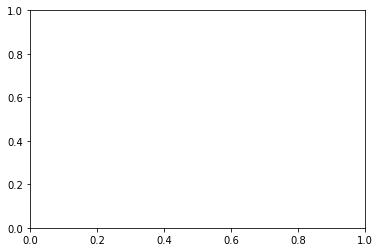

In [3]:
plt.figure()
for i in range(nr-1):
    plt.plot(x_ZEF,mdot_x)
plt.show()

#ap.plot_diffusion(T,rT,nx_ZEF+nx_ZFE,xmax,'Figure 1')